<a href="https://colab.research.google.com/github/linainsaf/RESNET50_PNEUMONIA_DETECTION/blob/main/ResNet_VGG16_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [22]:
import random

import numpy as np
import pickle, gzip
import seaborn as sns
np.random.seed(123) # for reproducibility

import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,confusion_matrix

## Function to plot the accuracy and loss curves of our models 

In [23]:
def affiche(history):
 # summarize history for accuracy
 plt.plot(history.history['acc'])
 plt.plot(history.history['val_acc'])
 plt.title('model accuracy')
 plt.ylabel('accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()
 # summarize history for loss
 plt.plot(history.history['loss'])
 plt.plot(history.history['val_loss'])
 plt.title('model loss')
 plt.ylabel('loss')
 plt.xlabel('epoch')
 plt.legend(['train', 'test'], loc='upper left')
 plt.show()

##Import Data:

In [24]:
with gzip.open(('drive/MyDrive/chest_xray/pneumonia2.pkl.gz'), "rb") as file:
  [X_train,Y_train,X_test,Y_test] = pickle.load(file)

## Data Augmentation

In [25]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )


In [26]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow(X_train,Y_train, batch_size = 20)

# Flow validation images in batches of 20 using test_datagen generator
test_generator = train_datagen.flow(X_test,Y_test, batch_size = 20)


# Model Building 

## VGG16

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [27]:
vgghist = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 250, epochs = 5)


Epoch 1/5
250/250 [==============================] - 79s 315ms/step - loss: 0.1917 - acc: 0.9331 - val_loss: 0.8013 - val_acc: 0.7788
Epoch 2/5
250/250 [==============================] - 78s 312ms/step - loss: 0.1776 - acc: 0.9371 - val_loss: 0.5913 - val_acc: 0.8061
Epoch 3/5
250/250 [==============================] - 78s 312ms/step - loss: 0.1718 - acc: 0.9376 - val_loss: 0.7852 - val_acc: 0.8301
Epoch 4/5
250/250 [==============================] - 78s 312ms/step - loss: 0.1719 - acc: 0.9398 - val_loss: 0.6984 - val_acc: 0.8125
Epoch 5/5
250/250 [==============================] - 78s 310ms/step - loss: 0.1769 - acc: 0.9382 - val_loss: 0.9585 - val_acc: 0.7804


###Evaluation of VGG model

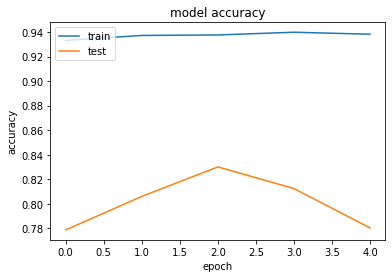

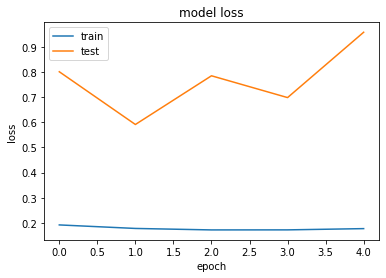

In [28]:
affiche(vgghist) #donnee en annexe

In [29]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

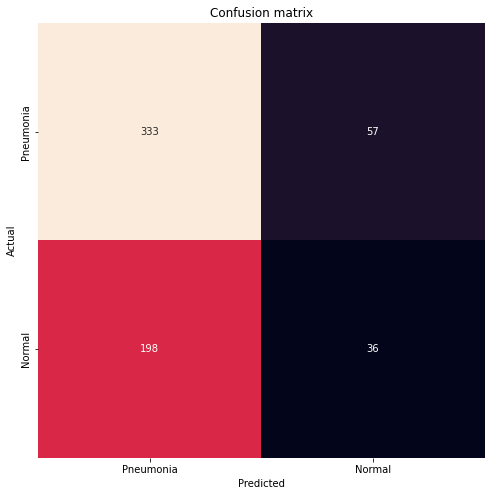

In [30]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72       390
           1       0.39      0.15      0.22       234

    accuracy                           0.59       624
   macro avg       0.51      0.50      0.47       624
weighted avg       0.54      0.59      0.53       624



## Inception V3

In [14]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [15]:
for layer in base_model.layers:
    layer.trainable = False

In [16]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [17]:
inception = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 250, epochs = 5)


Epoch 1/10
250/250 [==============================] - 87s 321ms/step - loss: 0.7098 - acc: 0.8523 - val_loss: 0.8824 - val_acc: 0.7516
Epoch 2/10
250/250 [==============================] - 78s 310ms/step - loss: 0.2669 - acc: 0.8966 - val_loss: 0.6453 - val_acc: 0.7837
Epoch 3/10
250/250 [==============================] - 78s 311ms/step - loss: 0.2412 - acc: 0.9119 - val_loss: 0.5148 - val_acc: 0.8285
Epoch 4/10
250/250 [==============================] - 78s 311ms/step - loss: 0.2097 - acc: 0.9249 - val_loss: 0.6457 - val_acc: 0.8013
Epoch 5/10
250/250 [==============================] - 77s 310ms/step - loss: 0.2138 - acc: 0.9215 - val_loss: 0.3856 - val_acc: 0.8686
Epoch 6/10
250/250 [==============================] - 78s 311ms/step - loss: 0.2097 - acc: 0.9235 - val_loss: 0.8258 - val_acc: 0.7708
Epoch 7/10
250/250 [==============================] - 78s 310ms/step - loss: 0.1892 - acc: 0.9297 - val_loss: 0.6800 - val_acc: 0.8141
Epoch 8/10
250/250 [==============================] - 7

###Evaluation of Inception model

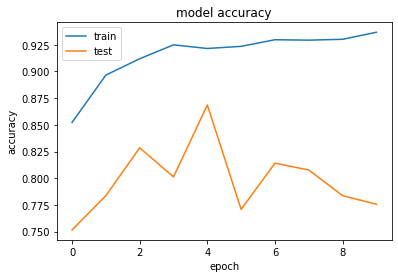

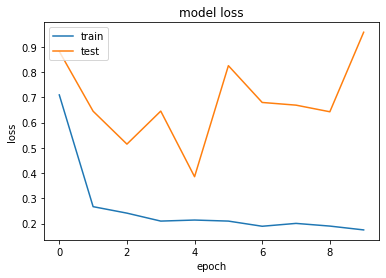

In [18]:
affiche(inception) #donnee en annexe

In [19]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

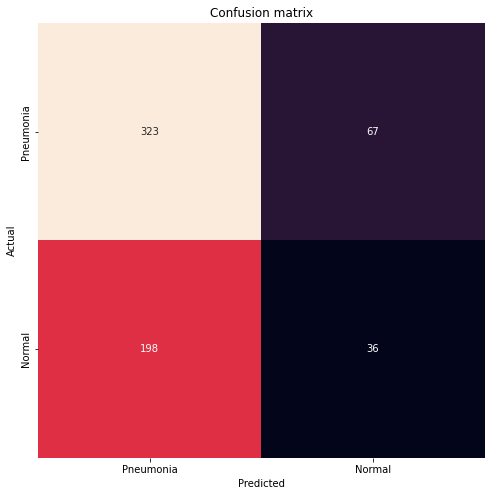

In [20]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71       390
           1       0.35      0.15      0.21       234

    accuracy                           0.58       624
   macro avg       0.48      0.49      0.46       624
weighted avg       0.52      0.58      0.52       624



## ResNet50

## Data Augmentation for ResNet

In [18]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow(X_train,Y_train, batch_size = 20)


In [20]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [23]:
resnet_history = model.fit(train_generator, validation_data = (X_test,Y_test), steps_per_epoch = 250, epochs = 10)


Epoch 1/10
250/250 [==============================] - 84s 318ms/step - loss: 0.6463 - acc: 0.8847 - val_loss: 0.3388 - val_acc: 0.9022
Epoch 2/10
250/250 [==============================] - 79s 314ms/step - loss: 0.2964 - acc: 0.9179 - val_loss: 0.3179 - val_acc: 0.9054
Epoch 3/10
250/250 [==============================] - 78s 313ms/step - loss: 0.2430 - acc: 0.9349 - val_loss: 0.5809 - val_acc: 0.8798
Epoch 4/10
250/250 [==============================] - 79s 314ms/step - loss: 0.2408 - acc: 0.9361 - val_loss: 0.3657 - val_acc: 0.9103
Epoch 5/10
250/250 [==============================] - 79s 314ms/step - loss: 0.2276 - acc: 0.9402 - val_loss: 0.2988 - val_acc: 0.9183
Epoch 6/10
250/250 [==============================] - 79s 314ms/step - loss: 0.2296 - acc: 0.9460 - val_loss: 0.5036 - val_acc: 0.9006
Epoch 7/10
250/250 [==============================] - 79s 314ms/step - loss: 0.2428 - acc: 0.9424 - val_loss: 0.4241 - val_acc: 0.9071
Epoch 8/10
250/250 [==============================] - 7

###Evaluation of ResNet 50 model

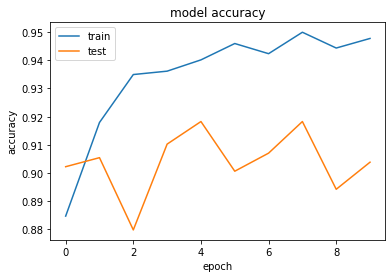

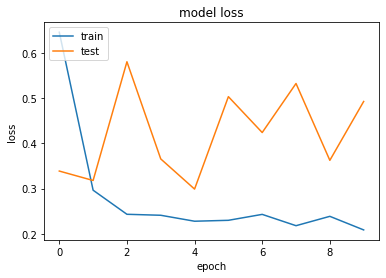

In [24]:
affiche(resnet_history) #donnee en annexe

In [25]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
Y_truth=np.argmax(Y_test, axis=1)

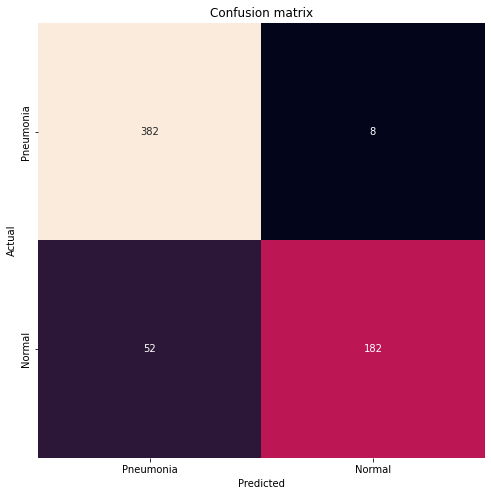

In [26]:
classnames = ['Pneumonia', 'Normal']
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(Y_truth, predicted_classes), cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
print(classification_report(Y_truth, predicted_classes))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       390
           1       0.96      0.78      0.86       234

    accuracy                           0.90       624
   macro avg       0.92      0.88      0.89       624
weighted avg       0.91      0.90      0.90       624

